# Domain Analysis

# Importing Libraries and  Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')

# Basic Checks

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Visualising

In [8]:
#univariate analysis
import sweetviz as sv
my_report= sv.analyze(df)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


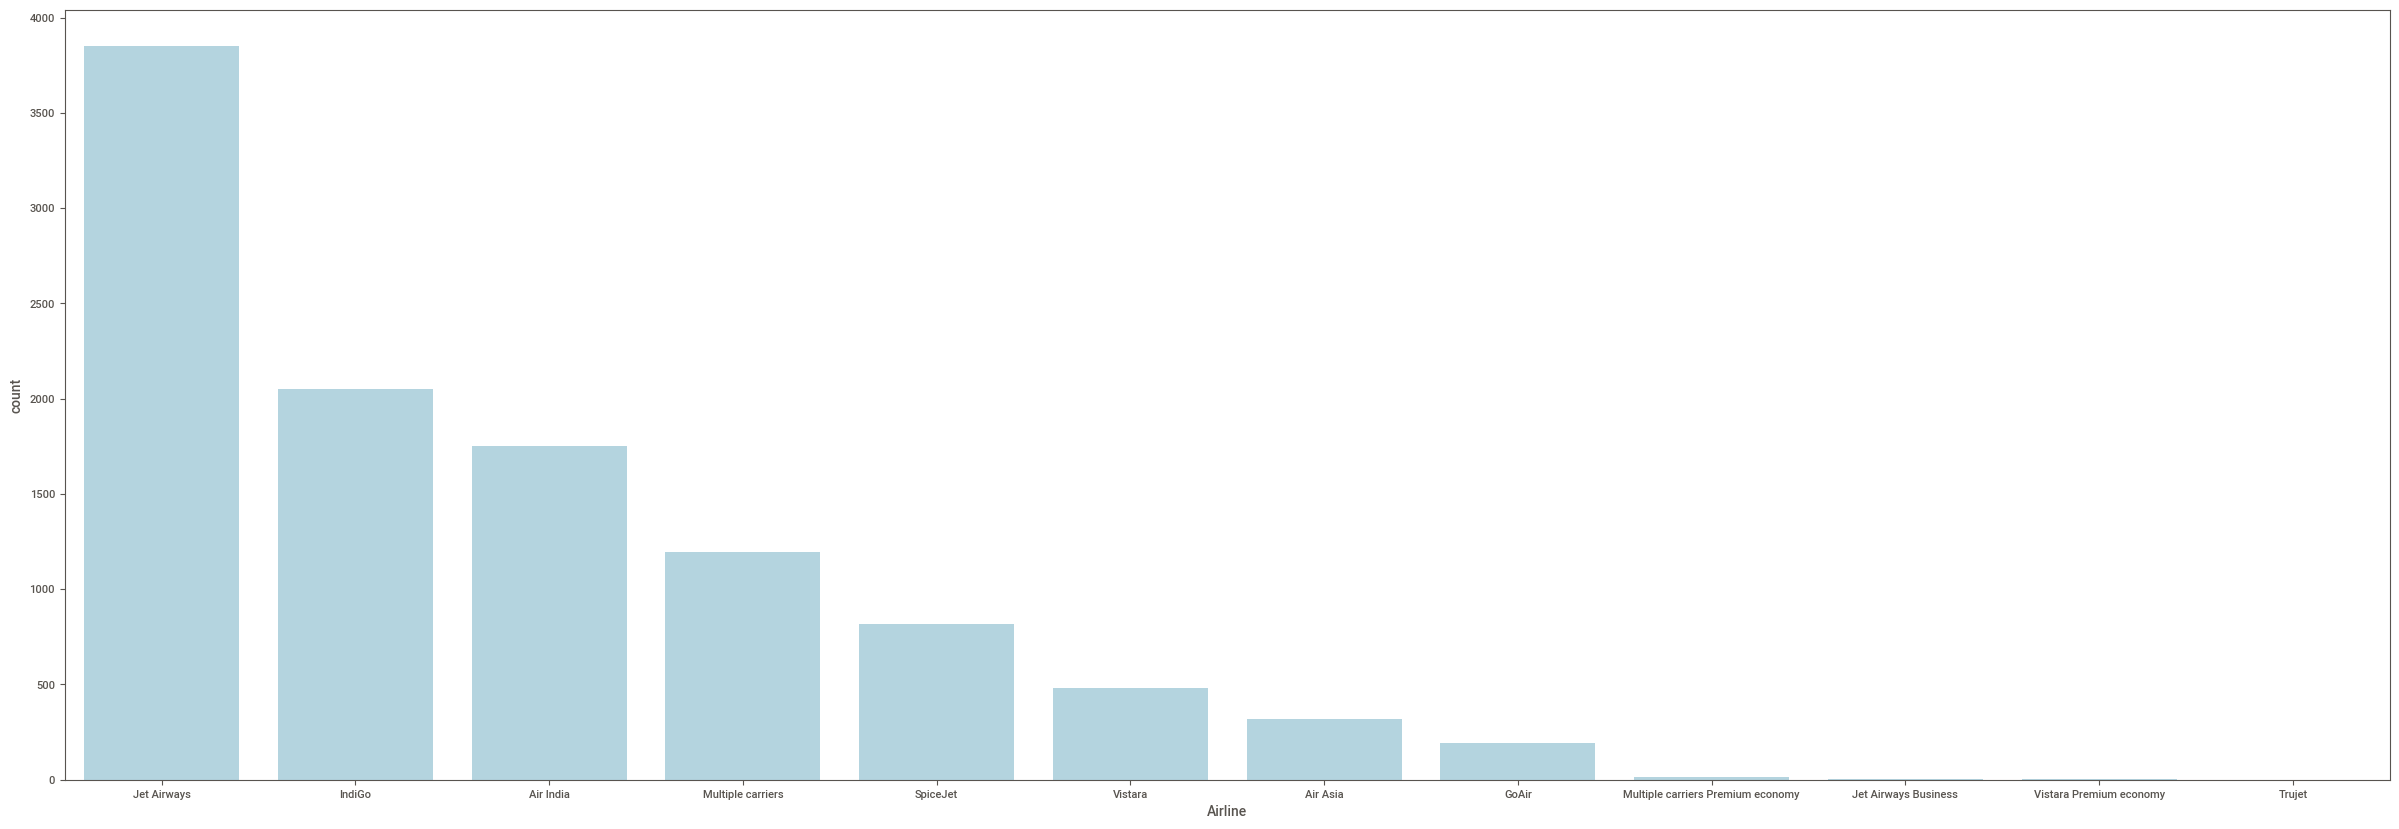

In [9]:
#bivariate analysis
plt.figure(figsize=(30,10))
sns.countplot(data=df,x=df['Airline'],color='LightBlue',order=df['Airline'].value_counts().index)
plt.show()

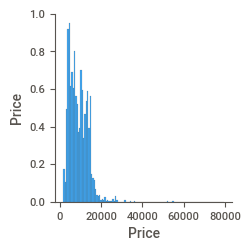

In [10]:
#pair plot
sns.pairplot(data=df)
plt.show()

# Data Cleaning

##### Checking for missing values

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Checking for duplicate rows

In [14]:
df.duplicated().sum()

220

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.duplicated().sum()

0

##### Checking for outliers

In [17]:
#df['Price'] = df['Price'].apply(np.sqrt)

In [18]:
df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

<Axes: ylabel='Price'>

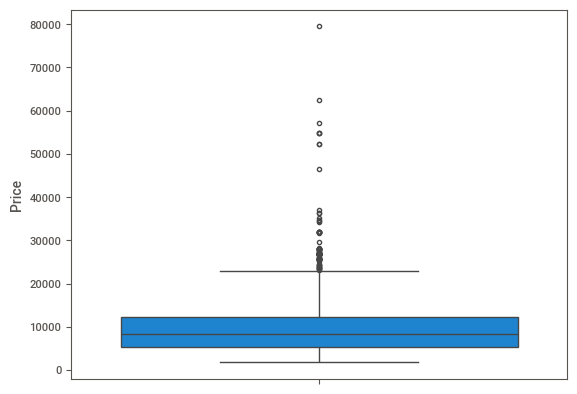

In [19]:
sns.boxplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

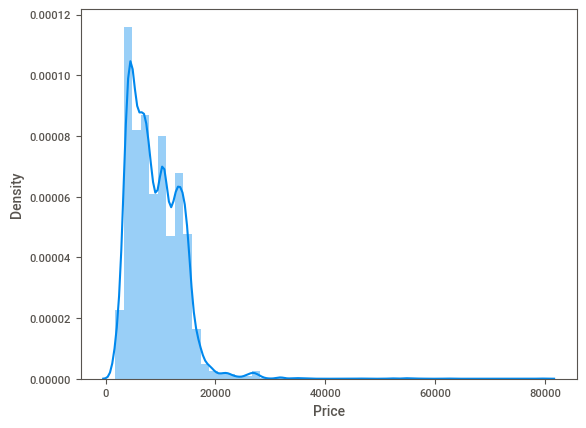

In [20]:
sns.distplot(df['Price'])

In [21]:
mean_value = df['Price'].mean()
# Replaced the outliers with the median value
df['Price'][df['Price'] > mean_value] = mean_value

In [22]:
df['Price']

0        3897.000000
1        7662.000000
2        9026.790289
3        6218.000000
4        9026.790289
            ...     
10678    4107.000000
10679    4145.000000
10680    7229.000000
10681    9026.790289
10682    9026.790289
Name: Price, Length: 10462, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

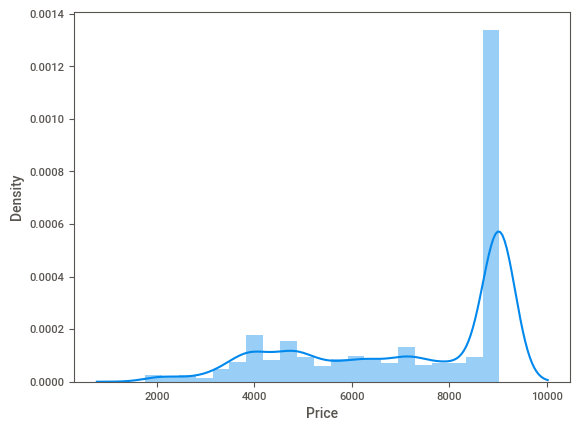

In [23]:
sns.distplot(df['Price'])

# Data Preprocessing

In [24]:
#Date_of_Journey
df["Day_of_ Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["month_of_Journey"] = pd.to_datetime (df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'],axis= 1,inplace= True)
df.head ()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9026.790289,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9026.790289,1,3


In [25]:
#Dep_Time
df['Dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']= pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.000000,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,9026.790289,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.000000,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,9026.790289,1,3,16,50


In [26]:
#Arrival_Time
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']= pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.000000,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.000000,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,9026.790289,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.000000,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,9026.790289,1,3,16,50,21,35


In [27]:
#Duration
duration= list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]

duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [28]:
df['Duration_hour']= duration_hour
df['duration_min']= duration_min
df.drop(['Duration'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.000000,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.000000,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9026.790289,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.000000,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,9026.790289,1,3,16,50,21,35,4,45


In [29]:
#Airline
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [30]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [31]:
#Source
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [32]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [33]:
#Destination
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [35]:
#Route,Additional_Info
df.drop(['Route','Additional_Info'],axis= 1,inplace= True)

In [36]:
#Total_Stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [38]:
data = pd.concat([df,Airline,Source,Destination],axis=1)
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data

,Total_Stops,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.000000,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662.000000,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,9026.790289,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218.000000,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,9026.790289,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.000000,9,4,19,55,22,25,2,30,...,False,False,False,True,False,False,False,False,False,False
10679,0,4145.000000,27,4,20,45,23,20,2,35,...,False,False,False,True,False,False,False,False,False,False
10680,0,7229.000000,27,4,8,20,11,20,3,0,...,False,False,False,False,False,False,True,False,False,False
10681,0,9026.790289,1,3,11,30,14,10,2,40,...,False,False,False,False,False,False,False,False,False,True


# Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
data[['Day_of_ Journey', 'month_of_Journey', 'Duration_hour',
       'duration_min']]= scale.fit_transform(data[['Day_of_ Journey', 'month_of_Journey', 'Duration_hour',
       'duration_min']])

# Feature selection

In [40]:
data.columns

Index(['Total_Stops', 'Price', 'Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [41]:
data.shape

(10462, 30)

In [42]:
X=data.loc[:,['Total_Stops','Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y= data.iloc[:,1:2]

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[2.89990047e-01 5.58896817e-02 3.73779977e-02 1.52091868e-02
 1.46565984e-02 1.53454826e-02 1.26551500e-02 2.31967867e-01
 1.03578964e-02 1.59003364e-02 8.57231114e-03 4.13561576e-02
 1.03757694e-01 8.60099286e-06 3.04798729e-03 6.23400656e-04
 1.44708049e-02 1.70149858e-04 9.35723837e-03 1.64597990e-04
 1.43114384e-03 1.66904337e-02 6.89699925e-03 1.26348396e-02
 3.45378994e-02 9.47461876e-03 1.19407526e-02 1.67947353e-03
 2.38346539e-02]


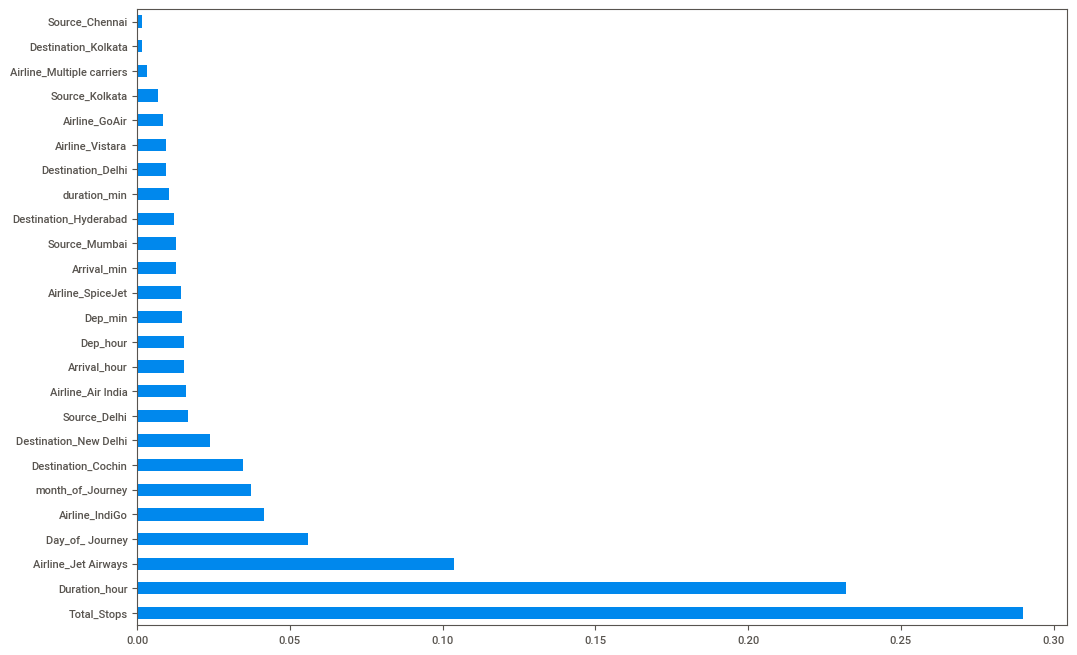

In [44]:
# graph of feature importance
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [45]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [47]:
X = data.loc[:, ['Total_Stops', 'Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
y= data.iloc[:,1:2]

### Model Creation

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [50]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_predict= rf_reg.predict(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() #object creation
LR.fit(X_train,y_train) #training of linear regression
y_predict_L=LR.predict(X_test)

In [52]:
y_test

,Price
3691,9026.790289
7995,5583.000000
2895,9026.790289
3859,9026.790289
2586,6790.000000
...,...
9198,7642.000000
5804,3625.000000
6481,6937.000000
2416,8073.000000


In [53]:
y_predict

array([8599.02013382, 6352.16580577, 9005.71716644, ..., 7176.99150131,
       8712.20873714, 9024.91238578])

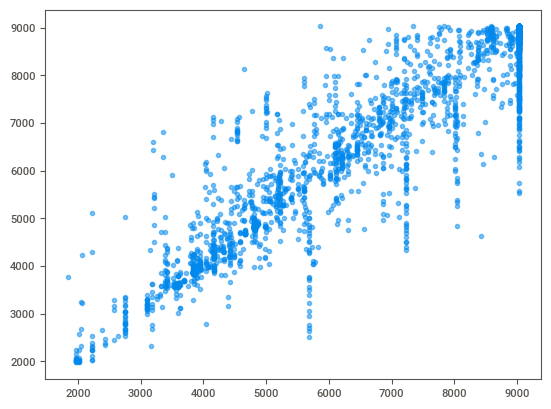

In [54]:
plt.scatter(y_test,y_predict,alpha=0.5)
plt.show()

In [55]:
## Metrics for random forest regressor

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('r2_score: ',r2)
print('mean_squared_error: ',mse)
print('mean_absolute_error: ',mae)
print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_predict)))

r2_score:  0.8867819648316593
mean_squared_error:  507050.8383326997
mean_absolute_error:  387.0591008696099
root_mean_squared_error:  712.0750229664707


In [56]:
## Metrics for Linear regression model

r2 = r2_score(y_test, y_predict_L)
mse = mean_squared_error(y_test, y_predict_L)
mae = mean_absolute_error(y_test, y_predict_L)
print('r2_score: ',r2)
print('mean_squared_error: ',mse)
print('mean_absolute_error: ',mae)
print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_predict_L)))

r2_score:  0.7514719072548707
mean_squared_error:  1113041.5537442823
mean_absolute_error:  787.3031006869461
root_mean_squared_error:  1055.0078453472668


# Saving the model 

In [57]:
import pickle
#opening file where we need to store model
file = open('flight_fare_prediction_model.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

## Model Comparison Report

## Report on challenges faced